# EDA validation 

In [4]:
import pandas as pd
from recsysUtility import RecSysUtility
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np

## Carico il dataset e pulisco le colonne

In [5]:
rsUtils = RecSysUtility('/home/andreafiandro/NAS/new/training.tsv')

In [6]:
df_train = pd.read_csv('/home/andreafiandro/NAS/new/training.tsv', sep='\u0001', header=None, nrows=4000000)
df_train = rsUtils.process_chunk_tsv(df_train)

## Overview dei dati

In [7]:
print ('Test shape',  df_train.shape)

Test shape (4000000, 24)


In [8]:
df_train['Text_tokens_count'] = df_train['Text_tokens'].apply(lambda x: len(x.split('|')))
df_train['Hashtags'] = df_train['Hashtags'].astype('str').apply(lambda x: len(x.split('|'))-1)
df_train.head()

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Reply_engagement_timestamp,Retweet_engagement_timestamp,Retweet_with_comment_engagement_timestamp,Like_engagement_timestamp,Text_tokens_count
0,101|16493|12478|117|10105|42370|76299|100|187|...,0,39024FBE0136E046D1357196BAECFCA6,GIF,0,0,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581532200,3BF0702AA3337E076DA5DF54E55117D1,...,2,29,0,1568107028,False,NaN,NaN,NaN,NaN,63
1,101|56898|137|186|10457|97575|11373|11166|131|...,0,4AE544DF8E20622635B87B6E2B8B6D2A,0,0,0,Retweet,ECED8A16BE2A5E8871FD55F4842F16B1,1581002124,46E6134373F19D742F24D6E72FC74360,...,225,185,0,1541013180,True,NaN,NaN,NaN,1.581009e+09,27
2,101|56898|137|37390|92306|19403|11205|131|8004...,0,87B10ACCFDB6603A63D1548754710328,Video,0,0,Retweet,E59EF8BB86A6D815331DDF4C467CE0C7,1581264014,DBCFEFD4018E2E89CC84C42F93F873DC,...,222,183,0,1541013180,True,NaN,NaN,NaN,NaN,31
3,101|56898|137|45010|66148|10738|10976|131|107|...,0,C0E81676727D9589555541E13A6D6F8D,Photo,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581286023,723A5C02BA1B2EDFAE0B271DF18EBEC0,...,179,237,0,1434078931,False,NaN,NaN,NaN,NaN,50
4,101|56898|137|139|11447|168|168|12078|131|8946...,0,F4DA426E8C8EF7846D1FF89472BC28D2,Video,0,0,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581431196,7A692CA6D7A76EDA2BA83FB6AD28B44D,...,56,108,0,1563441868,True,NaN,1.581431e+09,NaN,NaN,32


### Quanti valori NaN ci sono?

In [9]:
# Controllo quanti NaN ci sono
pd.DataFrame(df_train.isnull().sum(axis=0).head(20)).T

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,Follower_count,Following_count,Is_verified,Account_creation_time,User_id_engaging,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Quanti sono i valori unici per ogni variabile?

In [10]:
feats_counts = df_train.nunique(dropna = False)
pd.DataFrame(feats_counts.sort_values()).T

,Is_verified,Engagee_follows_engager,Is_verified_engaging,Tweet_type,Present_media,Hashtags,Language,Text_tokens_count,Following_count_engaging,Follower_count_engaging,...,Retweet_engagement_timestamp,Present_links,Like_engagement_timestamp,Timestamp,Account_creation_time,User_id,Text_tokens,Tweet_id,Account_creation_time_engaging,User_id_engaging
0,2,2,2,3,15,38,65,300,15977,28534,...,311241,360817,563388,599865,1639464,1643816,2779661,3228151,3408342,3431186


# Analisi singole features

## Hashtag

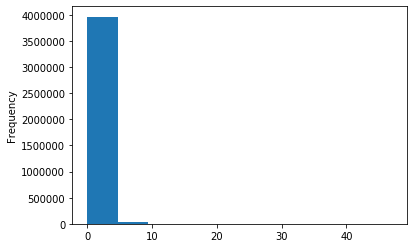

In [11]:
df_train['Hashtags'].plot(kind='hist')

## Text tokens

### Text_tokens

In [12]:
#df_train['Text_tokens'] = df_train['Text_tokens'].apply(lambda x: '|'.join(sorted(x.split('|'))))
pd.DataFrame(df_train['Text_tokens'].value_counts())

,Text_tokens
101|100|102,15506
101|102,979
101|75877|10134|169|48285|10135|10105|14866|10111|12820|34875|13457|10106|12976|10894|10529|10590|12820|10146|21157|14446|169|11132|19833|119|11469|48742|57243|10219|10124|13246|10798|21736|83065|10230|10114|19626|10146|17293|119|27062|10111|146|45567|16138|10111|82012|10107|10114|39422|10111|10105|19192|29451|11365|10135|10151|10119|53504|24854|11203|11940|119|102,966
101|56898|137|55457|11403|10537|10369|131|75877|10134|169|48285|10135|10105|14866|10111|12820|34875|13457|10106|12976|10894|10529|10590|12820|10146|21157|14446|169|11132|19833|119|11469|48742|144|100|102,806
101|56898|137|38702|10738|19282|131|11723|100|187|10192|21296|10114|47620|10105|38576|10796|19090|11222|10169|10531|11264|18832|10157|10108|10406|90739|15127|11888|10419|75339|111|10392|10410|132|15127|15739|137|11252|11044|62187|11236|146|16138|100|102,753
...,...
101|51462|72686|29923|10460|10824|10628|73403|10112|10131|103274|172|112|46226|10350|102231|10107|172|112|59966|119|119|119|119|119|11543|131|107|119|119|119|10131|12062|117|13055|47243|33738|10107|10141|11782|18994|10168|10931|30678|15709|10104|26642|254|20268|10104|53994|117|10154|13464|13003|22464|25205|10131|13055|48056|18679|10291|10608|112|10135|10361|180|112|10110|10161|32463|10107|119|119|119|107|119|119|13098|28311|28208|119|102,1
101|56898|137|10144|13820|15862|10305|131|32470|11762|10301|10105|27833|11951|21528|10114|47715|19626|10105|18337|126|136|119|17144|100|187|15148|90682|75980|12682|117|56566|17309|119|102,1
101|10911|75231|11750|45327|11371|15127|10635|12953|74302|14120|131|120|120|188|119|11170|120|170|10418|83026|11537|10418|13966|21330|11011|102,1
101|1894|2203|2833|2150|3642|2072|4460|1943|3992|17984|3780|4479|2695|1895|119|119|3197|3451|7599|5915|5900|4506|2077|4611|5900|119|119|1888|2833|44360|4796|1889|119|108|2833|44360|4796|108|1954|18767|14244|4302|4796|108|5915|5900|2191|8141|119|108|3780|4479|2695|108|2172|7838|119|108|1929|22526|28224|2172|7838|7069|1919|22526|119|108|3197|3451|7599|5915|5900|4506|2077|100|5900|108|3197|3451|7599|5915|5900|119|108|4506|2077|100|5900|108|4506|3504|108|5915|5900|14120|131|120|120|188|119|11170|120|139|10874|14703|10129|14703|20868|10123|12674|11490|102,1


In [44]:
df_train[df_train['Text_tokens'] == '101|100|102']['Tweet_type'].value_counts()

Quote       12291
TopLevel     3215
Name: Tweet_type, dtype: int64

### Count

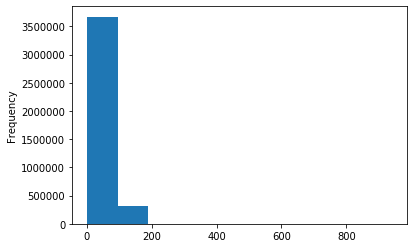

In [14]:
df_train['Text_tokens_count'].plot(kind='hist')

In [15]:
df_train['Text_tokens'].value_counts()[:10]

101|100|102                                                                                                                                                                                                                                                                                                                                                                        15506
101|102                                                                                                                                                                                                                                                                                                                                                                              979
101|75877|10134|169|48285|10135|10105|14866|10111|12820|34875|13457|10106|12976|10894|10529|10590|12820|10146|21157|14446|169|11132|19833|119|11469|48742|57243|10219|10124|13246|10798|21736|83065|10230|10114|19626|10146|17293|119|27062|10111|146|

## TweetID

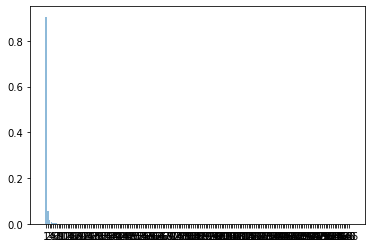

In [16]:
tweet_occ = df_train['Tweet_id'].value_counts().values
labels, counts = np.unique(tweet_occ, return_counts=True)
tot_el = counts.sum()
counts = [i / tot_el for i in counts]
y_pos = np.arange(len(labels))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

## Present links
Nota: si potrebbe costruire una feature a partire da un link che si ripete più volte
* File Feature per Link

In [17]:
df_train['Present_links'].value_counts()[:10]

0                                   3437182
E522B6C629B01DA6B29DE65BF5DFA55B       1010
140BCA0056E50C79778369C95D6DDC63        381
DEA673FD63DDDC8A3606106D5CA235B0        350
4C4CB3FCFEB284BAB26F4AB727B843F9        304
270B33AB02B6FB3F60B748CF1CB9AB75        282
180511B4A939ADAD39FDB6604C1A9AC5        279
9A25E9343866C0DECAFBB13F784AC74B        274
6DDBD9DAAA2AE38B8EBB54BA8E7098DD        267
F804191E9F4429E30AFCB1012FC0E660        256
Name: Present_links, dtype: int64

## Tweet Type

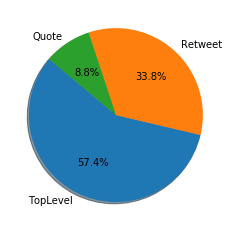

In [18]:
labels = df_train['Tweet_type'].value_counts().index.values
sizes = df_train['Tweet_type'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [19]:
df_train[df_train['Tweet_id'] == '97B2B88F6A4C30F67AD0868F8EBE5986']

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Reply_engagement_timestamp,Retweet_engagement_timestamp,Retweet_with_comment_engagement_timestamp,Like_engagement_timestamp,Text_tokens_count


### Possible dataleak

* Prendo tutti gli autori che sono anche user
* Filtro per gli autori che hanno condiviso un tweet di tipo Retweet
* Vado ad analizzare tra questi autori, l'azione precedente che hanno fatto, se i tweet corrispondono è un retweet

In [45]:
# Tutti gli autori che hanno condiviso un tweet
df_double = df_train[df_train['User_id'].isin(df_train['User_id_engaging'])]
# Tra questi autori -> Quanti hanno pubblicato un tweet di tipo retweet?
#retweet = df_double[df_double['Tweet_id'].isin(df_double[df_double['Tweet_type'] == 'Retweet']['Tweet_id'])].groupby('Tweet_id').count()
retweet = df_double[df_double['Tweet_type'] == 'Retweet']
retweet

,Text_tokens,Hashtags,Tweet_id,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Follower_count_engaging,Following_count_engaging,Is_verified_engaging,Account_creation_time_engaging,Engagee_follows_engager,Reply_engagement_timestamp,Retweet_engagement_timestamp,Retweet_with_comment_engagement_timestamp,Like_engagement_timestamp,Text_tokens_count
4,101|56898|137|139|11447|168|168|12078|131|8946...,0,F4DA426E8C8EF7846D1FF89472BC28D2,Video,0,0,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581431196,7A692CA6D7A76EDA2BA83FB6AD28B44D,...,56,108,0,1563441868,True,NaN,1.581431e+09,NaN,NaN,32
17,101|56898|137|14038|10123|168|10840|20764|131|...,0,B6F6EDC399D549BBE5D647E33C811D1D,0,E79CEF892A7C1CB51AF560BE06E1527C,FECA6F2E8244F2294BD2CE957C0602A9,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581504638,8165142DFF756184C7EB232EFE76FCC9,...,871,927,0,1359042454,True,NaN,NaN,NaN,1.581511e+09,33
26,101|56898|137|63193|16746|11305|11166|131|1894...,1,6A6D26A6F7B73BF0FACAA2D41C7C0A84,0,0,0,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581513342,42E0904D7E0DA371C6040E0330F30401,...,135,216,0,1566636367,False,NaN,1.581513e+09,NaN,NaN,98
41,101|56898|137|39774|76171|10165|10731|14752|10...,0,D84C303049FAE98E93DB2B3218B20438,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581235224,5382903E95AAA1121FDD4052A0B139A5,...,199,719,0,1304199357,False,NaN,NaN,NaN,NaN,52
49,101|56898|137|169|168|81582|10575|10874|131|10...,0,8A36C727A5CBC1BD303AC2340E8A666D,0,0,0,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581222195,052B461DAA1FF0DD074AD6D2C4453A64,...,348,306,0,1338861655,False,NaN,NaN,NaN,NaN,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999877,101|56898|137|147|11090|46704|10901|131|60987|...,0,8B605640D16676470D459729BA335A76,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581157505,121F9903C4FC2028A42B06DD2E315109,...,4,38,0,1578155412,True,NaN,1.581161e+09,NaN,NaN,30
3999903,101|56898|137|13068|61432|10253|11273|131|1248...,0,5935CB06BC29956341F5A4088E9363BF,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581151914,3EA9484C17991E60CEFEA1685DED3B2E,...,8,267,0,1575534033,False,NaN,NaN,NaN,NaN,41
3999913,101|56898|137|18863|84105|85429|27965|131|1028...,0,CC92CA5C10AD21BE3BE61E4EDE6D5CDE,0,0,0,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581344639,8420124E641A76930EAAD57F6F65DBD9,...,50,102,0,1560728196,False,NaN,1.581357e+09,NaN,NaN,38
3999950,101|56898|137|18756|11373|90533|131|25444|6968...,0,2FA5B8D09494F409CE66771B3B464C69,0,0,0,Retweet,22C448FF81263D4BAF2A176145EE9EAD,1581293804,BA36BBC4B79F16142DBACF212A4A5E91,...,132,250,0,1497592081,False,NaN,NaN,NaN,1.581301e+09,63


In [46]:
df_compare = retweet.merge(df_train[['User_id_engaging', 'Tweet_id', 'Text_tokens', 'Text_tokens_count']], left_on='User_id', right_on='User_id_engaging', suffixes=('_attuale', '_prec'))
df_compare

,Text_tokens_attuale,Hashtags,Tweet_id_attuale,Present_media,Present_links,Present_domains,Tweet_type,Language,Timestamp,User_id,...,Engagee_follows_engager,Reply_engagement_timestamp,Retweet_engagement_timestamp,Retweet_with_comment_engagement_timestamp,Like_engagement_timestamp,Text_tokens_count_attuale,User_id_engaging_prec,Tweet_id_prec,Text_tokens_prec,Text_tokens_count_prec
0,101|56898|137|139|11447|168|168|12078|131|8946...,0,F4DA426E8C8EF7846D1FF89472BC28D2,Video,0,0,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581431196,7A692CA6D7A76EDA2BA83FB6AD28B44D,...,True,NaN,1.581431e+09,NaN,NaN,32,7A692CA6D7A76EDA2BA83FB6AD28B44D,4E1790484895489ECD0C48387716DC05,101|8924|118729|8996|11287|9511|26737|11664|73...,35
1,101|56898|137|14038|10123|168|10840|20764|131|...,0,B6F6EDC399D549BBE5D647E33C811D1D,0,E79CEF892A7C1CB51AF560BE06E1527C,FECA6F2E8244F2294BD2CE957C0602A9,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581504638,8165142DFF756184C7EB232EFE76FCC9,...,True,NaN,NaN,NaN,1.581511e+09,33,8165142DFF756184C7EB232EFE76FCC9,1D6A7A408F58F9B6745EE2D6DAFC52F3,101|137|122|10369|20964|26127|35636|10129|100|...,75
2,101|56898|137|14038|10123|168|10840|20764|131|...,0,B6F6EDC399D549BBE5D647E33C811D1D,0,E79CEF892A7C1CB51AF560BE06E1527C,FECA6F2E8244F2294BD2CE957C0602A9,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581504638,8165142DFF756184C7EB232EFE76FCC9,...,True,NaN,NaN,NaN,1.581511e+09,33,8165142DFF756184C7EB232EFE76FCC9,AB9CC088FCD99CAE2AE2145EA0909A90,101|10117|15201|10112|10393|21031|10135|100|10...,46
3,101|56898|137|13872|66679|107331|10667|87372|1...,0,CBFAE3CD5FA619B754371BED169BF616,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581196784,8165142DFF756184C7EB232EFE76FCC9,...,True,NaN,1.581197e+09,1.581197e+09,NaN,58,8165142DFF756184C7EB232EFE76FCC9,1D6A7A408F58F9B6745EE2D6DAFC52F3,101|137|122|10369|20964|26127|35636|10129|100|...,75
4,101|56898|137|13872|66679|107331|10667|87372|1...,0,CBFAE3CD5FA619B754371BED169BF616,0,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581196784,8165142DFF756184C7EB232EFE76FCC9,...,True,NaN,1.581197e+09,1.581197e+09,NaN,58,8165142DFF756184C7EB232EFE76FCC9,AB9CC088FCD99CAE2AE2145EA0909A90,101|10117|15201|10112|10393|21031|10135|100|10...,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286498,101|56898|137|94836|23991|93349|10157|46704|13...,0,377EF5BFE473710800DF552EB94F2161,0,0,0,Retweet,4DC22C3F31C5C43721E6B5815A595ED6,1581188915,8F6AD39C0AF2E9923A7C70A923CDA44F,...,True,NaN,NaN,NaN,NaN,52,8F6AD39C0AF2E9923A7C70A923CDA44F,310AADFC8453CC8F7E34C54B3DD19676,101|141|110947|11274|246|10731|14703|11517|112...,20
286499,101|56898|137|102059|62281|37816|131|30929|129...,2,5A9DDDBD243D6795FFC14FE28FCD2367,Video,0,0,Retweet,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581074236,8C890B71AE2D8315343CDA99FFC493C8,...,False,NaN,NaN,NaN,1.581075e+09,60,8C890B71AE2D8315343CDA99FFC493C8,B0A43C879752D783413C37E098449809,101|16548|144|131|12489|112|187|19090|10135|13...,76
286500,101|56898|137|25470|11211|11477|10116|131|9358...,0,5C34A850D374173ADF3A6791076EBFC8,Video,0,0,Retweet,125C57F4FA6D4E110983FB11B52EFD4E,1581423065,0DB2D62C900A96E764BABE0C7995465B,...,True,NaN,1.581445e+09,NaN,1.581445e+09,58,0DB2D62C900A96E764BABE0C7995465B,789037EEB611DF4340AECB83937C6A3E,101|56898|137|25470|11211|11477|10116|131|9524...,75
286501,101|56898|137|18863|84105|85429|27965|131|1028...,0,CC92CA5C10AD21BE3BE61E4EDE6D5CDE,0,0,0,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581344639,8420124E641A76930EAAD57F6F65DBD9,...,False,NaN,1.581357e+09,NaN,NaN,38,8420124E641A76930EAAD57F6F65DBD9,F8BE7E8BB0DF21411386CB39B92BCB8D,101|56898|137|12606|16070|87015|100531|168|131...,43


In [56]:
df_detective = df_compare[df_compare['Text_tokens_attuale'] == df_compare['Text_tokens_prec']]
tids = df_detective['Tweet_id_prec']
uids = df_detective['User_id_engaging_prec']

In [62]:
df_100 = df_train[df_train['Tweet_id'].isin(tids) & df_train['User_id_engaging'].isin(uids)]['Retweet_engagement_timestamp'].apply(lambda x: 0 if pd.isna(x) else 1)

In [65]:
df_train['Retweet_engagement_timestamp'].apply(lambda x: 0 if pd.isna(x) else 1).value_counts()

0    3554100
1     445900
Name: Retweet_engagement_timestamp, dtype: int64

In [64]:
df_100.value_counts()

1    175
0     19
Name: Retweet_engagement_timestamp, dtype: int64

## User follow the author

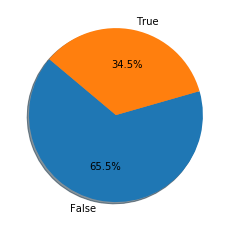

In [23]:
labels = df_train['Engagee_follows_engager'].value_counts().index.values
sizes = df_train['Engagee_follows_engager'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()